## Bibliotecas

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tratamiento de dataset

#### Leer dataset

In [24]:
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


#### Dataset en variables independientes y dependientes

In [16]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

print(f"primer registro de  x: {x[0]}")
print(f"primer registro de  y: {y[0]}")

primer registro de  x: [   19. 19000.]
primer registro de  y: 0


## Dividir dataset en entrenamiento y prueba

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

## Escalado de variables

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Modelo de clasificación

#### Implementar modelo de clasificación

In [10]:
# --> Teorema de bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

## Predicción

In [11]:
y_predict = classifier.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [39]:
for i in range(40, 63):
    pureba_test = classifier.predict(sc_x.transform([[i, 41000]]))

    if pureba_test == 1:
        print('El cliente comprará el producto')
        print(f'El cliente tiene {i} años y gana {41000} dolares')
    # else:
    #     print('El cliente NO comprará el producto')

El cliente comprará el producto
El cliente tiene 47 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 48 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 49 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 50 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 51 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 52 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 53 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 54 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 55 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 56 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 57 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 58 años y gana 41000 dolares
El cliente comprará el producto
El cliente tiene 59 años y gana 

## Evaluar rendimiento del modelo

#### matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

#### Interpretación gráfica

C:\Users\uriel\AppData\Local\Temp\ipykernel_5652\2807164798.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j,1],


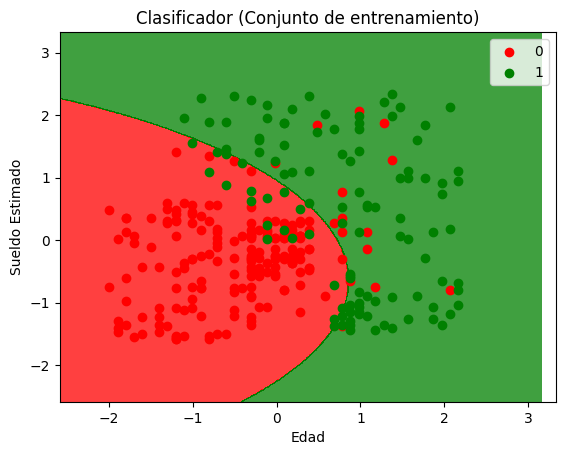

In [ ]:
from matplotlib.colors import ListedColormap


x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max() +1, step = 0.01),
    np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max() +1, step = 0.01)
)

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j,1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Clasificador (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()
